# Linera Regression with Regularization - Using SKLearn


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.linear_model  as LR
import sklearn.metrics as M


<H1>Read Data from CSV

In [2]:
dfTrain = pd.read_csv('../input/LinearRegressionDS/LinearRegressionTrainingData.csv')   #Training Dataset
dfTest = pd.read_csv('../input/LinearRegressionDS/LinearRegressionTestData.csv')   #Test Dataset
dfValid = pd.read_csv('../input/LinearRegressionDS/LinearRegressionValidData.csv') #Validation Dataset
dfTrain.head()

,X,Y
0,-15.936758,2.134311
1,-29.152979,1.173257
2,36.189549,34.359109
3,37.492187,36.837955
4,-48.058829,2.808965


<h5> Visualize Data

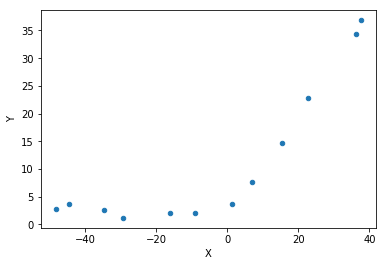

In [3]:
dfTrain.plot(x='X',y='Y',kind='scatter')

<h2>Extract Input Feature to <b>X </b>and Label to <b>y</b>

In [4]:
def extractFeatures(df):
    df_Features=df.iloc[:,0:1]
    df_Label=df.iloc[:,1:2]
    X=df_Features.values
    Y=df_Label.values
    return X,Y

In [5]:
X,Y=extractFeatures(dfTrain)
Xval,Yval=extractFeatures(dfValid)
Xtest,Ytest=extractFeatures(dfTest)

# Helper Functions

In [12]:
def mapFeature(X,degree,includeBiasVector=True):
    
    sz=X.shape[1]
    if (sz==2):
        sz=(degree+1)*(degree+2)/2
        sz=int(sz)
    else:
         sz=degree+1

    out=np.ones((X.shape[0],sz))

    sz=X.shape[1]
    if (sz==2):
        X1=X[:, 0:1]
        X2=X[:, 1:2]
        col=1
        for i in range(1,degree+1):        
            for j in range(0,i+1):
                out[:,col:col+1]= np.multiply(np.power(X1,i-j),np.power(X2,j))    
                col+=1
        return out
    else:
        for i in range(1,degree+1):        
            out[:,i:i+1]= np.power(X,i)
    if (includeBiasVector==False):
        out=out[:,1:] #Remove Bias Vector

    return out

In [6]:
def SKLearnRegression(Xtrain, ytrain,degree,regAlpha):
    Xp=mapFeature(Xtrain,degree,False)    #Polynomial  
    if (regAlpha==0):
        RegObj=LR.LinearRegression(normalize=True).fit(Xp,ytrain)
    else:
        RegObj=LR.Ridge(alpha=regAlpha,normalize=True).fit(Xp,ytrain)
    return RegObj


In [7]:
def SKLearnPredict(RegObj,X,degree):
    Xp=mapFeature(X,degree,False)    #Polynomial  
    Py=RegObj.predict(Xp)
    return Py

In [18]:
def SKLearnMSE(y_Actual,y_Predicted):
    MSE= M.mean_squared_error(y_Actual, y_Predicted)
    return MSE

# Plotting With Different Regularization Parameters and degree

In [14]:
def SKLearnPlotHypothesis(RegObj,X,y,degree,regAlpha):
    plt.scatter(X,y) 
    plt.title("Alpha="+str(regAlpha)+",Degree="+str(degree))
    x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+1 
    u = np.linspace(x_min, x_max, 100)
    u.shape=(len(u),1) 
    v=SKLearnPredict(RegObj,u,degree) 
    plt.plot(u, v,color='r')
    return

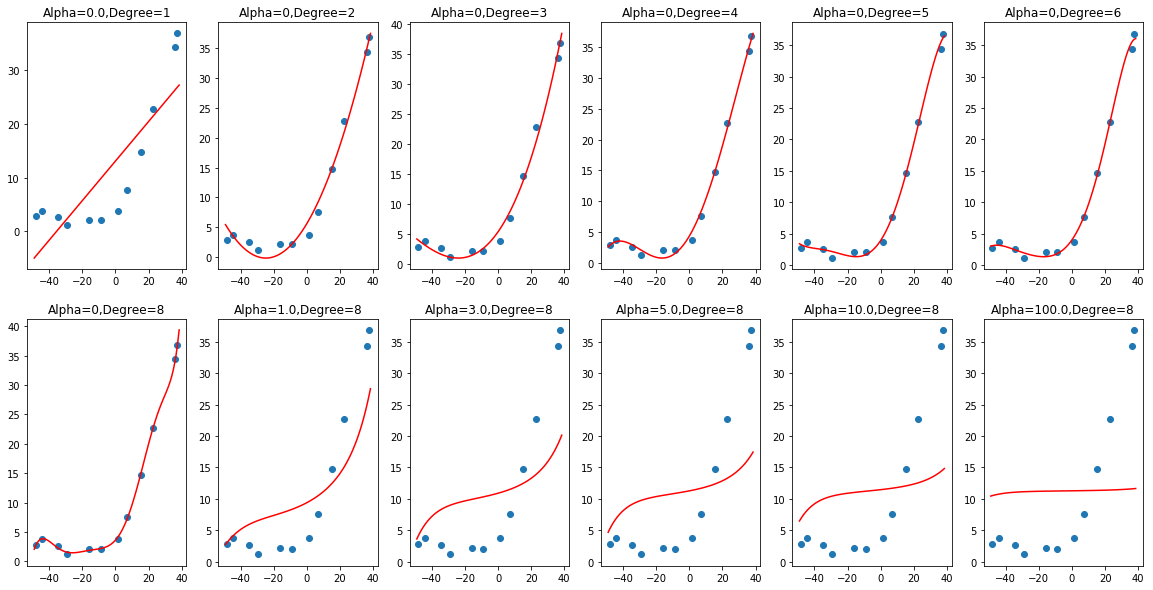

In [15]:
plt.figure(figsize=(20,10))
regAlphaList=[0.0,0,0,0,0,0,0,1.0,3.0,5.0,10.0,100.0]      #Lambda is named as Alpha in Ridge Regression
degreeList=[1,2,3,4,5,6,8,8,8,8,8,8]
for i in range(len(regAlphaList)):
    regAlpha=regAlphaList[i]
    degree=degreeList[i]
    RegObj=SKLearnRegression(X,Y,degree,regAlpha)
    plt.subplot(2 , int(len(regAlphaList)/2 +0.5), i+1)
    SKLearnPlotHypothesis(RegObj,X,Y,degree,regAlpha)
plt.show()

# Plotting Learning Curve

In [16]:
def plotLearningCurve(Xtrain, ytrain, Xval, yval, degree,regAlpha):
    m = len(Xtrain)
    training_error = np.zeros((m, 1))
    validation_error   = np.zeros((m, 1))
    for i in range(m):
        Current_Xtrain=Xtrain[0:i+1]
        Current_ytrain=ytrain[:i+1]
        RegObj = SKLearnRegression(Current_Xtrain, Current_ytrain,degree,regAlpha) 
        predicted_ytrain=SKLearnPredict(RegObj,Current_Xtrain,degree)       
        training_error[i]=SKLearnMSE(Current_ytrain,predicted_ytrain)
        predicted_yval=SKLearnPredict(RegObj,Xval,degree)
        validation_error[i]=SKLearnMSE(yval,predicted_yval)
    
    plt.plot(range(1,m+1), training_error)
    plt.plot( range(1,m+1), validation_error)
    plt.title('Learning Curve (Alpha = '+str(regAlpha)+',Degree='+str(degree)+')')  
    plt.legend(('Training', 'Cross Validation'))   
    plt.xlabel("Training")
    plt.ylabel("MSE")
    return


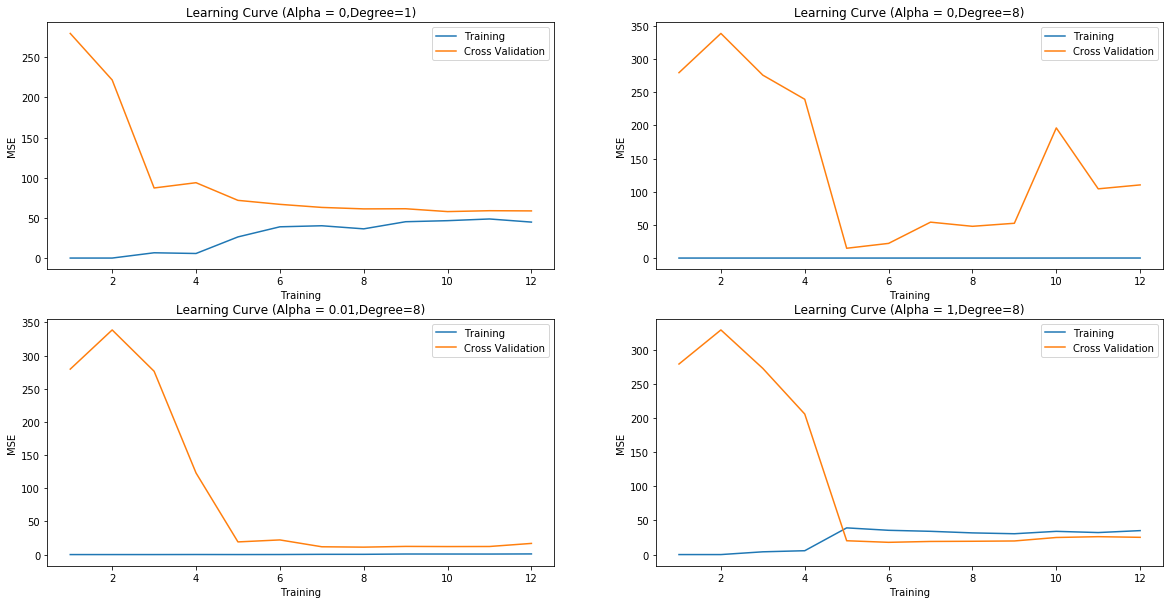

In [19]:
plt.figure(figsize=(20,10))
regLambdaList=[0,0,0.01,1]
degreeList=[1,8,8,8]
for i in range(len(regLambdaList)):
    regLambda=regLambdaList[i]
    degree=degreeList[i]
    plt.subplot(2 , int(len(regLambdaList)/2 +0.5), i+1)
    plotLearningCurve(X,Y,Xval,Yval,degree,regLambda)
plt.show()

# Plotting Validation Curve

In [21]:
def plotValidationCurveForAlpha(Xtrain, ytrain, Xval, yval, degree,regAlphaList):
        
    training_error = np.zeros((len(regAlphaList), 1))
    validation_error   = np.zeros((len(regAlphaList), 1))

    for i in range(len(regAlphaList)):
        regAlpha=regAlphaList[i]
        RegObj = SKLearnRegression(Xtrain,ytrain,degree,regAlpha) 

        predicted_ytrain=SKLearnPredict(RegObj,Xtrain,degree)       
        training_error[i]=SKLearnMSE(ytrain,predicted_ytrain)
        
        predicted_yval=SKLearnPredict(RegObj,Xval,degree)
        validation_error[i]=SKLearnMSE(yval,predicted_yval)    
    plt.plot(regAlphaList, training_error)
    plt.plot( regAlphaList, validation_error)
    plt.title('Validation Curve (Degree='+str(degree)+')')  
    plt.legend(('Training', 'Cross Validation'))   
    plt.xlabel("Alpha")
    plt.ylabel("MSE")
    return

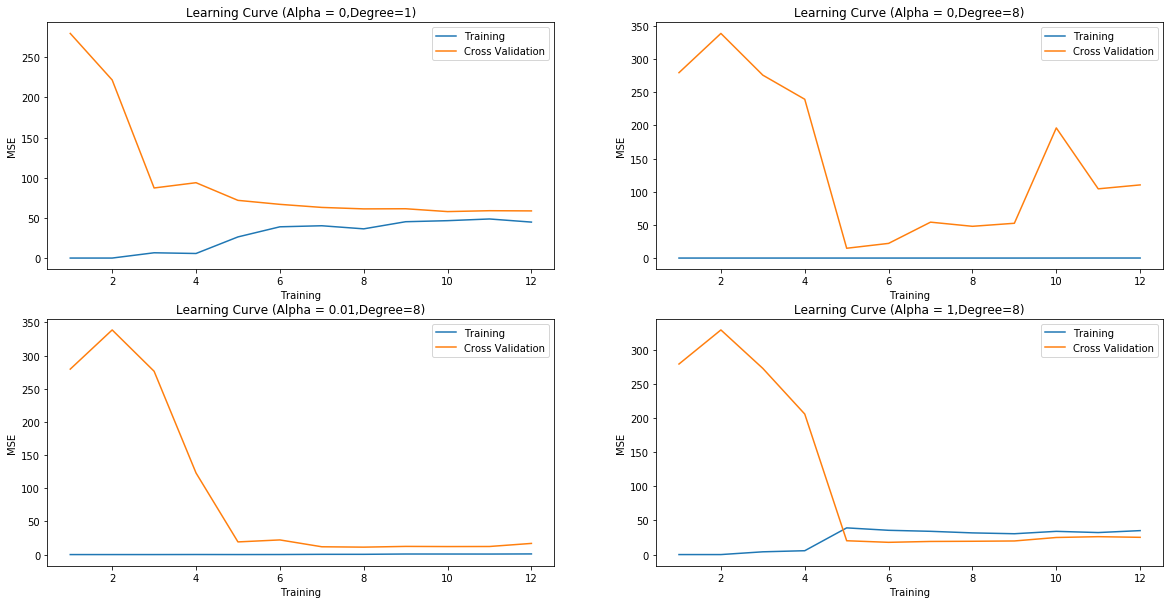

In [23]:
plt.figure(figsize=(20,10))
regAlphaList=[0,0,0.01,1]
degreeList=[1,8,8,8]
for i in range(len(regAlphaList)):
    regAlpha=regAlphaList[i]
    degree=degreeList[i]
    plt.subplot(2 , int(len(regAlphaList)/2 +0.5), i+1)
    plotLearningCurve(X,Y,Xval,Yval,degree,regAlpha)
plt.show()

# Final Plot and Test Error

In [24]:
def plotFinalCurve(Xtrain, ytrain, Xtest, ytest, degree,regAlpha):
    RegObj = SKLearnRegression(Xtrain,ytrain,degree,regAlpha)
    predicted_ytest=SKLearnPredict(RegObj,Xtest,degree)
    testErr=SKLearnMSE(ytest,predicted_ytest)
    #PLOT   
    X=np.concatenate((Xtrain,Xtest),axis=0)
    y=np.concatenate((ytrain,ytest),axis=0)
    x_min, x_max = X[:, 0].min()-1 , X[:, 0].max()+1 
    u = np.linspace(x_min, x_max, 100)
    u.shape=(len(u),1) 
    v=SKLearnPredict(RegObj,u,degree)
    plt.plot(u, v,color='r')
    plt.scatter(Xtrain,ytrain) 
    plt.scatter(Xtest,ytest)
    plt.title("Test data Alpha="+str(regAlpha ) +" , degree="+str(degree)+" with MSE="+str(round(testErr,4)))
    plt.legend(("Regression(Alpha=3,degree=8)","Training Data","Test Data"))
    return

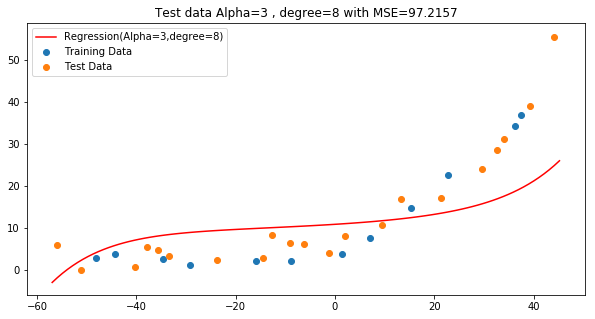

In [25]:
plt.figure(figsize=(10,5))
degree=8
regLambda=3
plotFinalCurve(X,Y,Xtest,Ytest,degree,regLambda)
plt.show()